## KNN (K-Nearest-Neighbors)
### Valeria Pérez Cong S
### 145009

Brief description: generate a data set with many circles distributed in a plane, the points inside the circles belong to the category in and the points outside belong to the category out 

### Data generation

In order to generate the data, we used the following code in R Studio: 

#### Circulo 1: 

+ x <- runif(2000, -5, 5)
+ y <- runif(2000, -5, 5)
+ r <- 2
+ target <- ifelse(sqrt(x^2+y^2) <= r, 1,0)

#### Circulo 2:

+ x_3 <- runif(2000, -7, 7)
+ y_3 <- runif(2000, -7, 7)
+ r <- 3
+ target_3 <- ifelse(sqrt(((x_3)-6)^2+((y_3)-3)^2) <= r, 1,0)

#### Circulo 3:

+ x_4 <- runif(2000, -5, -2.5)
+ y_4 <- runif(2000, -5, -2.5)
+ r <- 1
+ target_4 <- ifelse(sqrt(((x_4)+4)^2+((y_4)+4)^2) <= r, 1,0)


![circles](circles.png "Different Circles")

Como se puede observar, hay 3 circulos diferentes, con centros y radios diferentes. Los puntos dentro de los circulos tienen 1 en la variable target y 0 de caso contrario.

In [1]:
import tensorflow as tf

import os
import io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy.stats import norm
from sklearn import preprocessing
from random import random
import math
from sklearn import datasets, linear_model

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

from pylab import *
from sklearn import svm

import sklearn.neighbors as knn



In [95]:
circle=pd.read_csv("/Users/valeriaperezcong/Desktop/ITAM/9/aprendizaje/udemy/DataScience-Python3/knn/circulos.csv")


In [96]:
circle.describe()

,x,y,target
count,6000.000000,6000.000000,6000.000000
mean,-1.286786,-1.238360,0.232667
std,3.363943,3.406956,0.422567
min,-6.987297,-6.999066,0.000000
25%,-3.946463,-3.926854,0.000000
50%,-2.624817,-2.624619,0.000000
75%,1.350513,1.470690,0.000000
max,6.996845,6.997474,1.000000


In [55]:
#from sklearn.cross_validation import train_test_split

#X_train, X_test, Y_train, Y_test = train_test_split(circle[['x','y']],
                                                    circle['target'], test_size=0.30, random_state=42)

In [56]:
#X=np.asarray(X_train)
#Y=np.asarray(Y_train)

In [97]:
col_x= circle.ix[:,0]
col_y=circle.ix[:,1]
target=circle.ix[:,2]

In [98]:
X=[]
Y=[]

for i in range (0,6000):
    X.append([col_x[i],col_y[i]])

for j in range (0,6000):
    Y.append([target[j]])
    
X=np.asarray(X)
Y=np.asarray(Y)


In [99]:
X

array([[ 4.11718121, -3.51448206],
       [ 3.14005506, -4.89383563],
       [ 0.7357352 ,  2.14407161],
       ..., 
       [-2.97829885, -4.05152985],
       [-3.12591953, -2.73194731],
       [-2.78258512, -4.36056733]])

In [100]:
X.shape

(6000, 2)

In [101]:
Y.shape

(6000, 1)

In [102]:
indices = np.random.permutation(X.shape[0])
training_idx, test_idx = indices[:4200], indices[4200:]
X_train = X[training_idx,:]
X_test = X[test_idx,:]
Y_train= Y[training_idx,:]
Y_test = Y[test_idx,:]

In [104]:
indices

array([5500, 4104, 2523, ...,  539, 2620, 3199])

In [105]:
X_train=np.asarray(X_train)
Y_train=np.asarray(Y_train)

X_test=np.asarray(X_test)
Y_test=np.asarray(Y_test)

## Red Neuronal

In [106]:
input_size = 2
output_layer_size = 1

input_data= tf.placeholder(tf.float32,[None, input_size])

target = tf.placeholder(tf.float32,[None, output_layer_size])

hidden_nodes=15



input_weights=tf.Variable(tf.random_uniform([input_size,hidden_nodes],-1,1),name="input_weights")

input_biases= tf.Variable(tf.random_uniform([hidden_nodes]),name="input_biases")



hidden_weights= tf.Variable(tf.random_uniform([hidden_nodes,output_layer_size],-1,1),name="hidden_weights")

hidden_biases=tf.Variable(tf.random_uniform([output_layer_size]),name="hidden_biases")

input_layer=tf.matmul(input_data,input_weights)
hidden_layer=tf.nn.sigmoid(input_layer+input_biases)



output_layer=tf.nn.sigmoid(tf.matmul(hidden_layer,hidden_weights)+hidden_biases)

loss_function=tf.reduce_mean(tf.reduce_sum((target-output_layer)**2))

optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss_function)


In [107]:
##corremos la red
init=tf.global_variables_initializer()
sess=tf.Session()

train_steps=[]
errores=[]
input_biases_array=[] 
hidden_biases_array=[] 

input_weights_array=[] 
hidden_weights_array=[]

#corremos 5000 training steps
sess.run(init)
for i in range(5000):
    train, error, input_w, hidden_w, input_b,hidden_b = sess.run([optimizer, loss_function, input_weights, hidden_weights, input_biases, hidden_biases], feed_dict={input_data: X, target: Y})
    errores.append(error)
    train_steps.append(train)
    hidden_biases_array.append(hidden_b)
    

In [108]:
correct_prediction = tf.equal(tf.round(output_layer),target)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={input_data: X, target: Y})) 


0.779833


### K-nearest neighbors

### Con 20 neighbors 

Accuracy=
0.921111111111


/Users/valeriaperezcong/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


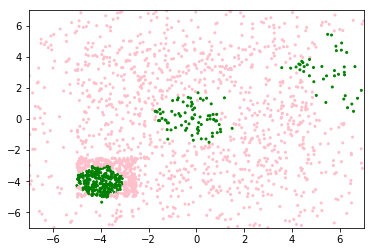

In [111]:
import sklearn.neighbors as knn

print("Accuracy=")
knnM=knn.KNeighborsClassifier(n_neighbors=20)
knnM.fit(X_train, Y_train)
Y_knn = knnM.predict(X_test)
print(knnM.score(X_test,Y_test))

plt.scatter(X_test[:,0],X_test[:,1],c=['green' if i==1 else 'pink' for i in Y_knn], s=4)
plt.ylim([-7,7])
plt.xlim([-7,7])
plt.show()
plt.clf()

### Con k=10

Accuracy=


/Users/valeriaperezcong/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.923888888889


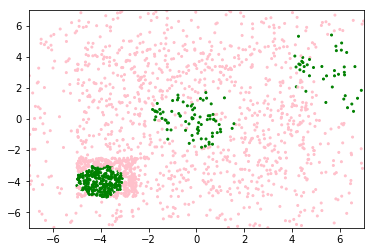

In [112]:
import sklearn.neighbors as knn

print("Accuracy=")
knnM=knn.KNeighborsClassifier(n_neighbors=10)
knnM.fit(X_train, Y_train)
Y_knn = knnM.predict(X_test)
print(knnM.score(X_test,Y_test))

plt.scatter(X_test[:,0],X_test[:,1],c=['green' if i==1 else 'pink' for i in Y_knn], s=4)
plt.ylim([-7,7])
plt.xlim([-7,7])
plt.show()
plt.clf()

### Con k=5

Accuracy=
0.930555555556


/Users/valeriaperezcong/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


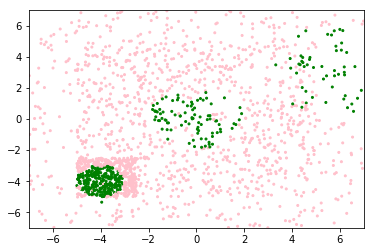

In [113]:
import sklearn.neighbors as knn

print("Accuracy=")
knnM=knn.KNeighborsClassifier(n_neighbors=5)
knnM.fit(X_train, Y_train)
Y_knn = knnM.predict(X_test)
print(knnM.score(X_test,Y_test))

plt.scatter(X_test[:,0],X_test[:,1],c=['green' if i==1 else 'pink' for i in Y_knn], s=4)
plt.ylim([-7,7])
plt.xlim([-7,7])
plt.show()
plt.clf()

### Con k=2

Accuracy=
0.908888888889


/Users/valeriaperezcong/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


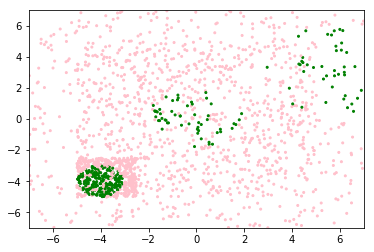

In [114]:
import sklearn.neighbors as knn

print("Accuracy=")
knnM=knn.KNeighborsClassifier(n_neighbors=2)
knnM.fit(X_train, Y_train)
Y_knn = knnM.predict(X_test)
print(knnM.score(X_test,Y_test))

plt.scatter(X_test[:,0],X_test[:,1],c=['green' if i==1 else 'pink' for i in Y_knn], s=4)
plt.ylim([-7,7])
plt.xlim([-7,7])
plt.show()
plt.clf()

Se hubiera pensado que a medida de que disminuye la K el desempeño mejora, pero como se puede ver el desempeño con k=2 disminuyó. 